### ✅ Import libs

In [24]:
# General Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dython.nominal import associations
from plotly.subplots import make_subplots
from dython.nominal import associations

from sklearn.model_selection import train_test_split
# oultiers detection 
from datasist.structdata import detect_outliers


# Display settings
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# Handling warnings
import warnings
warnings.filterwarnings("ignore")

## Data Preparation 

### ✅ Data Understanding 

#### ✅ Load Data

In [2]:
df = pd.read_csv("hotel_bookings - hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### ✅ Check Info

In [3]:
# let's show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### ✅ Check Duplicates 

In [4]:
df.duplicated().sum()

np.int64(31994)

#### ✅ Check nulls

In [5]:
(df.isnull().sum()/df.shape[0])*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

#### ✅ Summary analysis 

In [6]:
# let's show summary analysis for numeric data 
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
# let's show it for Categoric Data 
df.select_dtypes(include="object").describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


#### ✅ Detect Outliers 

In [8]:
# we need subtitles also we will use for loop
for column in df.select_dtypes(exclude='object').columns :
    print(f"'Box Plot for {column}',")

'Box Plot for is_canceled',
'Box Plot for lead_time',
'Box Plot for arrival_date_year',
'Box Plot for arrival_date_week_number',
'Box Plot for arrival_date_day_of_month',
'Box Plot for stays_in_weekend_nights',
'Box Plot for stays_in_week_nights',
'Box Plot for adults',
'Box Plot for children',
'Box Plot for babies',
'Box Plot for is_repeated_guest',
'Box Plot for previous_cancellations',
'Box Plot for previous_bookings_not_canceled',
'Box Plot for booking_changes',
'Box Plot for agent',
'Box Plot for company',
'Box Plot for days_in_waiting_list',
'Box Plot for adr',
'Box Plot for required_car_parking_spaces',
'Box Plot for total_of_special_requests',


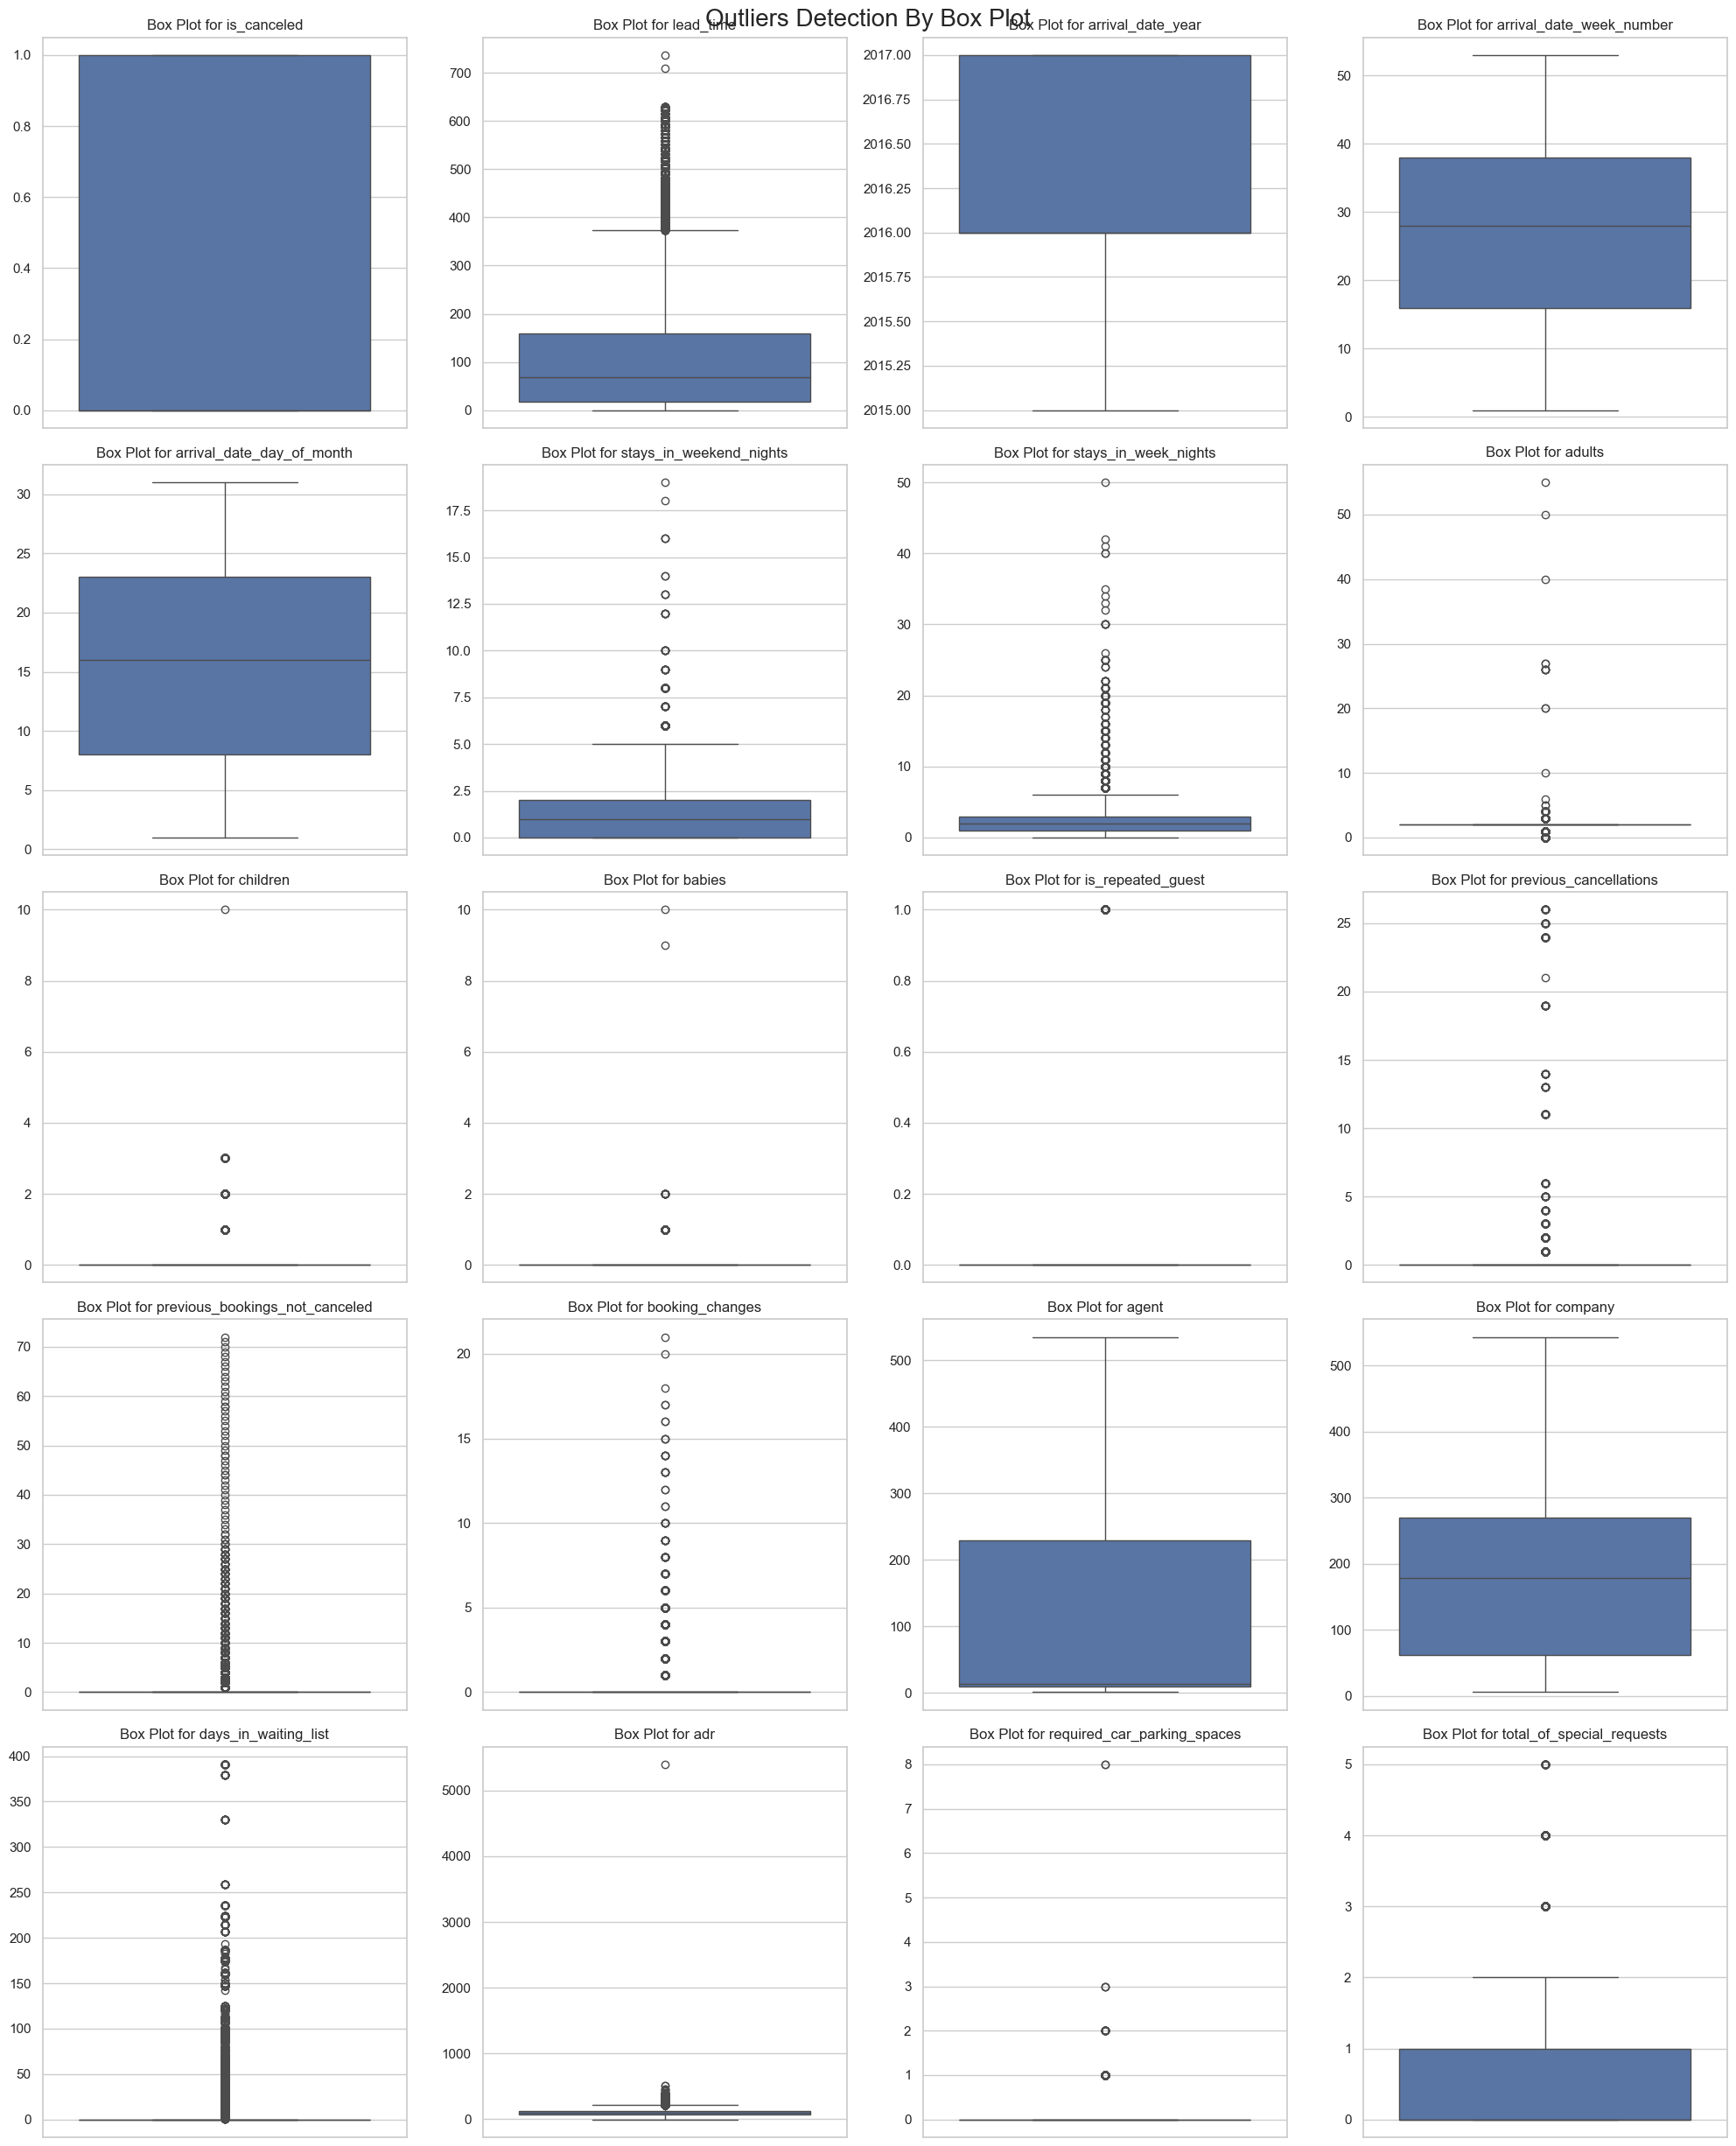

In [9]:
# Set up the subplot grid
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
fig.suptitle('Outliers Detection By Box Plot', fontsize=20, y=0.98)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# List of variables to plot in order
variables = df.select_dtypes(exclude='object').columns.tolist()

# Titles for each subplot
titles = [
    'Box Plot for is_canceled', 'Box Plot for lead_time', 'Box Plot for arrival_date_year',
    'Box Plot for arrival_date_week_number', 'Box Plot for arrival_date_day_of_month',
    'Box Plot for stays_in_weekend_nights', 'Box Plot for stays_in_week_nights', 'Box Plot for adults',
    'Box Plot for children', 'Box Plot for babies', 'Box Plot for is_repeated_guest',
    'Box Plot for previous_cancellations', 'Box Plot for previous_bookings_not_canceled', 'Box Plot for booking_changes',
    'Box Plot for agent', 'Box Plot for company', 'Box Plot for days_in_waiting_list', 'Box Plot for adr',
    'Box Plot for required_car_parking_spaces', 'Box Plot for total_of_special_requests'
]

# Create a box plot for each variable
for i, (var, title) in enumerate(zip(variables, titles)):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(title, fontsize=12)
    axes[i].set_ylabel('')  # Remove y-axis label for cleaner look

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

I analyzed the box plots in your image, and here’s the report:

✅ Columns with Outliers

1. **lead\_time**
2. **stays\_in\_weekend\_nights**
3. **stays\_in\_week\_nights**
4. **adults**
5. **children**
6. **babies**
7. **previous\_cancellations**
8. **previous\_bookings\_not\_canceled**
9. **booking\_changes**
10. **days\_in\_waiting\_list**
11. **adr**
12. **required\_car\_parking\_spaces**
13. **total\_of\_special\_requests**

---

⚠️ Columns with No or Very Minimal Outliers

* **is\_canceled**
* **arrival\_date\_year**
* **arrival\_date\_week\_number**
* **arrival\_date\_day\_of\_month**
* **is\_repeated\_guest**
* **agent**
* **company**

---

In [10]:
features_name = ["lead_time", 
 "stays_in_weekend_nights", 
 "stays_in_week_nights", 
 "adults", 
 "children", 
 "babies", 
 "previous_cancellations", 
 "previous_bookings_not_canceled", 
 "booking_changes", 
 "days_in_waiting_list", 
 "adr", 
 "required_car_parking_spaces", 
 "total_of_special_requests"]

outidx = detect_outliers(df,0,features_name)

df.iloc[outidx][features_name].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,60256.0,111.766662,122.643080,0.00,13.0,68.0,173.0,737.0
stays_in_weekend_nights,60256.0,0.931443,1.104075,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,60256.0,2.596804,2.279861,0.00,1.0,2.0,3.0,50.0
adults,60256.0,1.715481,0.790410,0.00,1.0,2.0,2.0,55.0
children,60255.0,0.119359,0.431976,0.00,0.0,0.0,0.0,10.0
babies,60256.0,0.015749,0.136705,0.00,0.0,0.0,0.0,10.0
previous_cancellations,60256.0,0.172614,1.182280,0.00,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,60256.0,0.271641,2.099135,0.00,0.0,0.0,0.0,72.0
booking_changes,60256.0,0.438131,0.864876,0.00,0.0,0.0,1.0,21.0
days_in_waiting_list,60256.0,4.599077,24.554276,0.00,0.0,0.0,0.0,391.0


### ✅Data Quality Report 

**Data Quality Assessment Report: Hotel Booking Dataset**

**Date:** October 26, 2023
**Dataset:** 119,390 entries, 32 columns

This report outlines the critical data quality issues identified in the hotel bookings dataset. Addressing these issues is crucial for ensuring the reliability of any subsequent analysis, model building, or business intelligence reporting.

---

**1. Duplicate Records**

*   **Issue:** The dataset contains a significant number of duplicate rows.
*   **Evidence:** `df.duplicated().sum()` returned **31,994** duplicate entries.
*   **Impact:** Duplicates severely skew analysis. They can lead to overcounting, misrepresentation of booking frequencies, inflated importance of certain patterns, and biased machine learning models. Metrics like average daily rate (ADR), cancellation rates, and stay duration would be inaccurate.
*   **Recommendation:** **Remove duplicate rows.** Before removal, investigate if these are true duplicates (e.g., same booking ID) or legitimate separate bookings with identical attributes (which is less likely). The `keep='first'` parameter in `drop_duplicates()` is typically appropriate.

**2. Missing Values**

Several columns contain missing data, with varying levels of severity:

*   **Critical Missingness (`>5%`):**
    *   **`company`:** **94.3% missing** (Only 6,797 non-null values). This column is almost completely empty and is unusable in its current state.
    *   **`agent`:** **13.7% missing** (16,340 entries). This is a significant portion of records missing the ID of the travel agency that made the booking.
*   **Moderate Missingness (`<5%`):**
    *   **`country`:** **0.4% missing** (488 entries). The customer's country of origin is missing for a small but non-negligible number of bookings.
    *   **`children`:** **0.003% missing** (4 entries). A very small number of records are missing the count of children.

*   **Impact:**
    *   **`company`:** This column is effectively **useless for analysis** and would introduce massive bias if used.
    *   **`agent`:** Analysis of agent performance or bookings by agency will be incomplete and potentially biased.
    *   **`country`:** Geographic analysis will be slightly incomplete. The missing values are likely not random (e.g., could be direct bookings where country wasn't captured).
    *   **`children`:** Negligible impact; can be safely imputed.

*   **Recommendation:**
    *   **`company`:** **Drop the column entirely.** It does not provide meaningful information.
    *   **`agent`:** **Impute missing values with 0** (creating a new category like "No Agent" or "Direct Booking"). Alternatively, for agent-based analysis, you may need to exclude these records.
    *   **`country`:** For a small number of missing values, imputation using the mode (most frequent country) is an option. A better approach is to create a "Unknown" category to mark these records.
    *   **`children`:** Impute the 4 missing values with 0, assuming no children were present.

**3. Outliers and Invalid Values**

The statistical summary and outlier detection reveal extreme values that are likely errors:

*   **Issue 1: Impossible Guest Counts**
    *   **Evidence:** `adults: max=55`, `children: max=10`, `babies: max=10`. A booking with 55 adults or 10 babies is highly improbable and likely a data entry error.
*   **Issue 2: Extreme Financial Values**
    *   **Evidence:** `adr: min=-6.38`, `adr: max=5400`. The Average Daily Rate (ADR) should be a positive value. A negative ADR is invalid. An ADR of $5400 is an extreme outlier, even for luxury hotels, and is probably an error.
*   **Issue 3: Unusually Long Stays**
    *   **Evidence:** `stays_in_week_nights: max=50`. A stay of 50 week nights (over 7 weeks) is possible but rare. Combined with other outliers, it merits investigation.
*   **Issue 4: Outlier Impact**
    *   **Evidence:** The description of the outlier subset (60,256 records) shows these records have significantly different statistics (higher mean `lead_time`, `adr`, `previous_cancellations`, etc.) than the overall dataset.

*   **Impact:** Outliers, especially erroneous ones, distort statistical measures (mean, standard deviation) and can have a disproportionate influence on machine learning models, leading to poor generalization.

*   **Recommendation:**
    *   **Capping/Winsorizing:** For columns like `adr`, `adults`, `children`, and `babies`, cap the maximum values at a reasonable threshold (e.g., adr at 99.9th percentile, adults at 4 or 6, children/babies at 4).
    *   **Filtering:** Remove records with impossible values (e.g., `adults == 0` and `children == 0` and `babies == 0`—a booking with no guests; `adr < 0`).
    *   **Contextual Analysis:** Investigate long stays (`week_nights`) and high `previous_cancellations`—some may be legitimate (e.g., long-term rentals, problematic customers). Don't remove them blindly; consider them a separate segment.

**4. Data Type Inconsistency**

*   **Issue:** The `reservation_status_date` column is stored as an `object` (string) instead of a `datetime` data type.
*   **Impact:** This prevents any time-series analysis. You cannot easily calculate the time between booking and arrival, extract day/month/year, or model trends over time.
*   **Recommendation:** **Convert `reservation_status_date` to a `datetime` dtype** using `pd.to_datetime()`.

---

**Summary of Recommended Actions**

| Priority | Issue | Recommended Action |
| :--- | :--- | :--- |
| **Critical** | Duplicate Records | Remove 31,994 duplicate rows. |
| **Critical** | `company` Column | Drop the entire column due to 94% missing data. |
| **High** | `agent` Missingness | Impute 13.7% missing `agent` values with `0` (No Agent). |
| **High** | Invalid Values | Cap extreme values in `adr`, `adults`, `children`, `babies`. Filter records with `adr < 0` and `no guests`. |
| **Medium** | `country` Missingness | Impute 0.4% missing `country` with "Unknown". |
| **Medium** | Data Type | Convert `reservation_status_date` to `datetime`. |
| **Low** | `children` Missingness | Impute 4 missing `children` values with `0`. |


### ✅ Data Cleaning 

#### ✅ Handling Missing Values

In [11]:
# My 1st step it will be delete company column we can consider it full nulls, 
df.drop(columns=['company'],inplace=True)

# 2nd step let's fill nulls in agent with ffill and bfill 
df['agent'] = df['agent'].fillna(method='ffill').fillna(method='bfill') 


# 3rd step it's for handling missing in Country with mode 
df['country'] = df['country'].fillna(value=df['country'].mode()[0])

# 4th step fill children with 0, it's a small num of nulls(4)
df['children'] = df['children'].fillna(value=0)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

#### ✅ Drop Duplicates

In [12]:
# we have about 30k full duplicates rows 
# let's remove it 
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,304.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,304.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87903,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
87904,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
87905,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
87906,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### ✅ Handling Outliers  

In [13]:
# i well see max at first
for column in features_name:
    print(f"Max in {column}: {df[column].max()} ")

Max in lead_time: 737 
Max in stays_in_weekend_nights: 19 
Max in stays_in_week_nights: 50 
Max in adults: 55 
Max in children: 10.0 
Max in babies: 10 
Max in previous_cancellations: 26 
Max in previous_bookings_not_canceled: 72 
Max in booking_changes: 21 
Max in days_in_waiting_list: 391 
Max in adr: 5400.0 
Max in required_car_parking_spaces: 8 
Max in total_of_special_requests: 5 


In [14]:
caps_data = {
    "lead_time": 365,           # Cap at 1 year (365 days)
    "stays_in_weekend_nights": 7, # Cap at 1 week of weekend nights
    "stays_in_week_nights": 21,   # Cap at 3 weeks of week nights
    "adults": 6,                 # Cap at reasonable family/group size
    "children": 4,               # Cap at reasonable number of children
    "babies": 2,                 # Cap at reasonable number of infants
    "previous_cancellations": 10, # Cap at excessive cancellation history
    "previous_bookings_not_canceled": 30, # Cap at very loyal customer threshold
    "booking_changes": 5,        # Cap at reasonable number of changes
    "days_in_waiting_list": 30,  # Cap at 1 month waiting
    "adr": 1000,                 # Cap at $1000/night (luxury rate)
    "required_car_parking_spaces": 3, # Cap at reasonable parking needs
    "total_of_special_requests": 5    # Already reasonable, no cap needed
}

In [15]:
for column in features_name:
    df[column] = df[column].clip(upper=caps_data[column])

df[features_name].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87908.0,79.479535,84.339032,0.00,11.0,49.0,125.0,365.0
stays_in_weekend_nights,87908.0,1.000319,1.011688,0.00,0.0,1.0,2.0,7.0
stays_in_week_nights,87908.0,2.620023,2.015475,0.00,1.0,2.0,4.0,21.0
adults,87908.0,1.870626,0.513988,0.00,2.0,2.0,2.0,6.0
children,87908.0,0.137837,0.453747,0.00,0.0,0.0,0.0,4.0
babies,87908.0,0.010591,0.104237,0.00,0.0,0.0,0.0,2.0
previous_cancellations,87908.0,0.028814,0.299780,0.00,0.0,0.0,0.0,10.0
previous_bookings_not_canceled,87908.0,0.172339,1.422247,0.00,0.0,0.0,0.0,30.0
booking_changes,87908.0,0.266438,0.666340,0.00,0.0,0.0,0.0,5.0
days_in_waiting_list,87908.0,0.260420,2.720573,0.00,0.0,0.0,0.0,30.0


#### ✅ Fix Date Column

In [16]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [17]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,304.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,365,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,304.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87903,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
87904,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
87905,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
87906,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


### ✅ Feature Engineering & Preprocessing 

#### ✅ Creating Features 

In [18]:
df["total_guests"] = df['adults']+df['children']+df['babies']
df['total_nights'] = df['stays_in_week_nights']+df['stays_in_weekend_nights']
df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).astype(int)

#### ✅ Encoding Cats

In [19]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
hotel,87908,2,City Hotel,53685
arrival_date_month,87908,12,August,11291
meal,87908,5,BB,68414
country,87908,177,PRT,28172
market_segment,87908,8,Online TA,51613
distribution_channel,87908,5,TA/TO,69254
reserved_room_type,87908,10,A,56987
assigned_room_type,87908,12,A,46670
deposit_type,87908,3,No Deposit,86713
customer_type,87908,4,Transient,72165


In [20]:
# make a copy withoud 
df_encoded = df.copy()

low_cardinality_features = [
        'hotel', 'meal', 'market_segment',
        'distribution_channel', 'deposit_type', 'customer_type',
    ]


high_cardinality_features = [
        'country', 'reserved_room_type', 'assigned_room_type'
    ]


for feature in low_cardinality_features:
    if feature in df_encoded.columns:
        dummies = pd.get_dummies(df_encoded[feature], prefix=feature, drop_first=False)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(feature, axis=1, inplace=True)


for feature in high_cardinality_features:
    if feature in df_encoded.columns:
        # Calculate frequency of each category
        freq_encoding = df_encoded[feature].value_counts(normalize=True)
        
        # Create a new column with frequency encoding
        df_encoded[f'{feature}_freq'] = df_encoded[feature].map(freq_encoding)
        
       
        threshold = 0.01  # Categories with less than 1% frequency will be grouped
        value_counts = df_encoded[feature].value_counts(normalize=True)
        to_replace = value_counts[value_counts < threshold].index
        df_encoded[feature] = df_encoded[feature].replace(to_replace, 'Other')
        
        # Apply one-hot encoding to the grouped feature
        dummies = pd.get_dummies(df_encoded[feature], prefix=feature, drop_first=False)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(feature, axis=1, inplace=True)

import datetime as dt

def month_to_number(month_name):
    return dt.datetime.strptime(month_name, '%B').month


df_encoded['arrival_date_month_num'] = df_encoded['arrival_date_month'].apply(month_to_number)
df_encoded.drop(columns=['arrival_date_month'],inplace=True)

In [21]:
df_encoded

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,is_family,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,country_freq,country_AUT,country_BEL,country_BRA,country_CHE,country_CN,country_DEU,country_ESP,country_FRA,country_GBR,country_IRL,country_ITA,country_NLD,country_Other,country_PRT,country_USA,reserved_room_type_freq,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_Other,assigned_room_type_freq,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_Other,arrival_date_month_num
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,304.0,0,0.00,0,0,Check-Out,2015-07-01,2.0,0,0,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,0.320471,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0.010454,False,False,True,False,False,False,False,False,0.024730,False,False,True,False,False,False,False,False,7
1,0,365,2015,27,1,0,0,2,0.0,0,0,0,0,4,304.0,0,0.00,0,0,Check-Out,2015-07-01,2.0,0,0,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,0.320471,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0.010454,False,False,True,False,False,False,False,False,0.024730,False,False,True,False,False,False,False,False,7
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0,Check-Out,2015-07-02,1.0,1,0,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,0.119739,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0.648257,True,False,False,False,False,False,False,False,0.024730,False,False,True,False,False,False,False,False,7
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0,Check-Out,2015-07-02,1.0,1,0,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0.119739,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0.648257,True,False,False,False,False,False,False,False,0.530896,True,False,False,False,False,False,False,False,7
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1,Check-Out,2015-07-03,2.0,2,0,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,0.119739,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0.648257,True,False,False,False,False,False,False,False,0.530896,True,False,False,False,False,False,False,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

#### ✅ Remove Data Leakage

In [22]:
df_encoded.drop(columns=['reservation_status','reservation_status_date'],inplace=True)

In [23]:
df_encoded

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,is_family,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,country_freq,country_AUT,country_BEL,country_BRA,country_CHE,country_CN,country_DEU,country_ESP,country_FRA,country_GBR,country_IRL,country_ITA,country_NLD,country_Other,country_PRT,country_USA,reserved_room_type_freq,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_Other,assigned_room_type_freq,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_Other,arrival_date_month_num
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,304.0,0,0.00,0,0,2.0,0,0,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,0.320471,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0.010454,False,False,True,False,False,False,False,False,0.024730,False,False,True,False,False,False,False,False,7
1,0,365,2015,27,1,0,0,2,0.0,0,0,0,0,4,304.0,0,0.00,0,0,2.0,0,0,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,0.320471,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0.010454,False,False,True,False,False,False,False,False,0.024730,False,False,True,False,False,False,False,False,7
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0,1.0,1,0,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,0.119739,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0.648257,True,False,False,False,False,False,False,False,0.024730,False,False,True,False,False,False,False,False,7
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0,1.0,1,0,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0.119739,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0.648257,True,False,False,False,False,False,False,False,0.530896,True,False,False,False,False,False,False,False,7
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1,2.0,2,0,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,0.119739,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0.648257,True,False,False,False,False,False,False,False,0.530896,True,False,False,False,False,False,False,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

#### ✅ Train And Test Split 

In [27]:
x = df_encoded.drop(columns=['is_canceled']).copy()
y = df_encoded['is_canceled']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print(f""" Datasets shape
x_train is: {x_train.shape}
x_test is: {x_test.shape}
y_train is: {y_train.shape}
y_test is: {y_test.shape}
""")

 Datasets shape
x_train is: (70326, 83)
x_test is: (17582, 83)
y_train is: (70326,)
y_test is: (17582,)



<div style="
    text-align: center;
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 40px;
    border-radius: 15px;
    color: white;
    font-family: Arial, sans-serif;
    box-shadow: 0 10px 30px rgba(0,0,0,0.2);
    margin: 20px auto;
    max-width: 400px;
">
    <div style="font-size: 3rem; margin-bottom: 15px;">✅</div>
    <h1 style="margin: 0; font-size: 2rem;">Project Done</h1>
    <p style="margin: 10px 0 0 0; opacity: 0.9;">Successfully completed!</p>
</div>